# Load the Dataset

import pandas as pd  # For working with data
import matplotlib.pyplot as plt  # For visualizing the data



In [3]:
df = pd.read_csv('1.data_20162017.csv')  
print(df.head())


               Time  HVAC Actual [kW]  Chiller Power [kW]  \
0  01/01/2016 00:00               0.0                 0.0   
1  01/01/2016 00:01               0.0                 0.0   
2  01/01/2016 00:02               0.0                 0.0   
3  01/01/2016 00:03               0.0                 0.0   
4  01/01/2016 00:04               0.0                 0.0   

   Humidifier power [kW]  HV light Power [kW]  Power[kW]  \
0                    0.0                0.001       0.02   
1                    0.0                0.001       0.02   
2                    0.0                0.001       0.02   
3                    0.0                0.001       0.02   
4                    0.0                0.001       0.02   

   PV panels power [kW]  Battery system power  
0                   0.0                   0.0  
1                   0.0                   0.0  
2                   0.0                   0.0  
3                   0.0                   0.0  
4                   0.0         

# Step 2: Preprocessing the Data 

In [6]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.month
df = df.dropna()
print(df.head())

                 Time  HVAC Actual [kW]  Chiller Power [kW]  \
0 2016-01-01 00:00:00               0.0                 0.0   
1 2016-01-01 00:01:00               0.0                 0.0   
2 2016-01-01 00:02:00               0.0                 0.0   
3 2016-01-01 00:03:00               0.0                 0.0   
4 2016-01-01 00:04:00               0.0                 0.0   

   Humidifier power [kW]  HV light Power [kW]  Power[kW]  \
0                    0.0                0.001       0.02   
1                    0.0                0.001       0.02   
2                    0.0                0.001       0.02   
3                    0.0                0.001       0.02   
4                    0.0                0.001       0.02   

   PV panels power [kW]  Battery system power  Hour  Day  
0                   0.0                   0.0     0    1  
1                   0.0                   0.0     0    1  
2                   0.0                   0.0     0    1  
3                   0.0 

# Step 3: Visualize the Energy Consumption

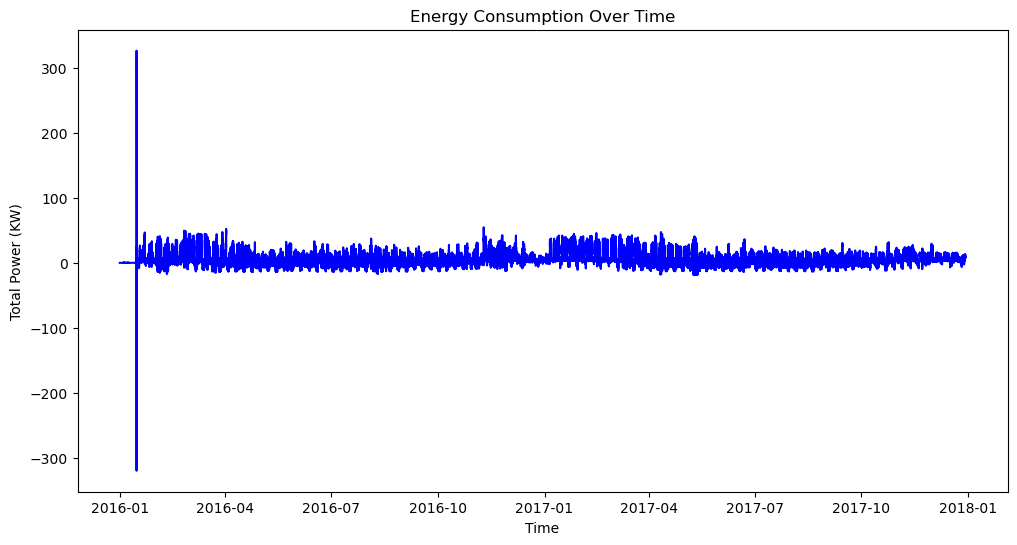

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(df['Time'], df['Power[kW]'], color = 'blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Total Power (KW)')
plt.show()

# Step 4:  Train a Machine Learning Model for Prediction
Now, we’ll use Linear Regression to predict energy consumption.

In [26]:
df['Month'] = df['Time'].dt.month

X = df[['Hour', 'Day', 'Month', 'HVAC Actual [kW]', 'Chiller Power [kW]', 'Humidifier power [kW]', 'HV light Power [kW]']]
y = df['Power[kW]']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 16.68013924006187


# Step 5: Visualize Predictions

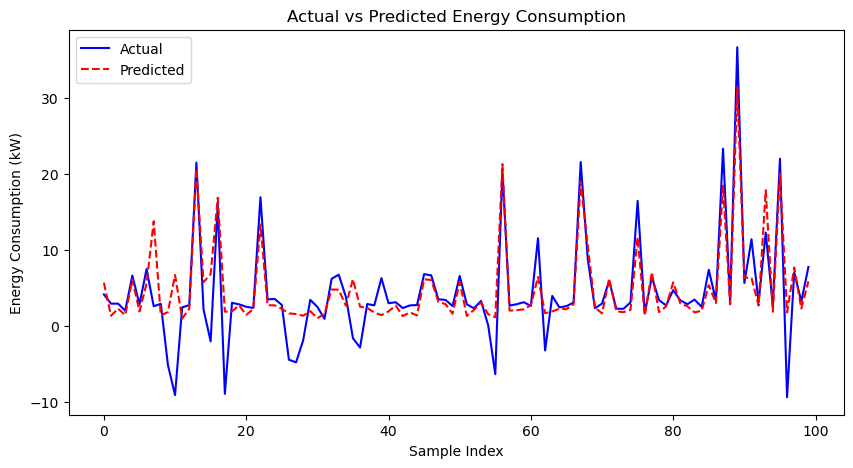

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', color='blue')  # Actual values
plt.plot(y_pred[:100], label='Predicted', color='red', linestyle='--')  # Predicted values
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.show()


# Step 6: Detect Faults with Anomaly Detection

C:\Users\jagri\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


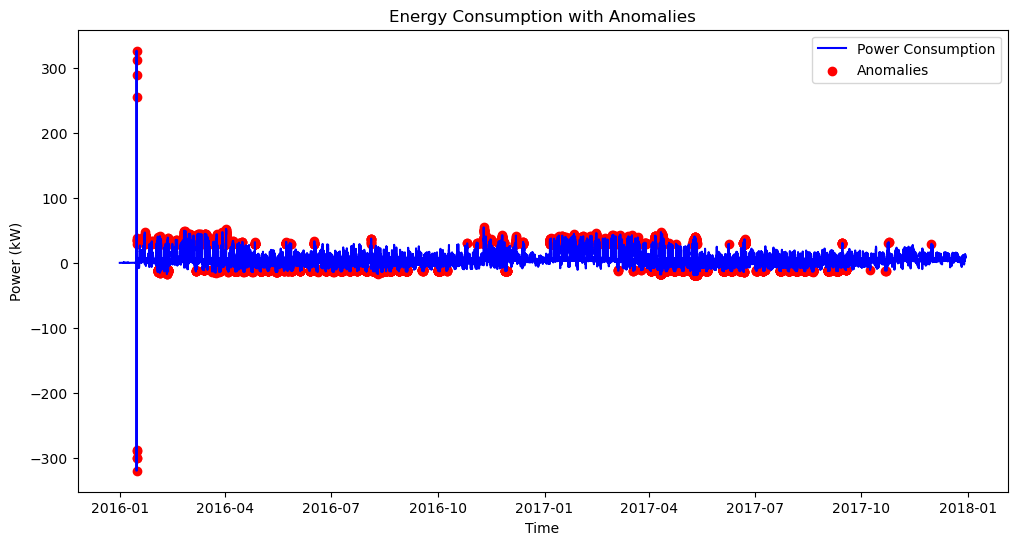

In [32]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Initialize Isolation Forest with 1% contamination (anomalies expected)
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Ensure the input to IsolationForest is always a dataframe with feature names
df['Anomaly'] = iso_forest.fit_predict(df[['Power[kW]']]) 

# Find and visualize anomalies
anomalies = df[df['Anomaly'] == -1]  

# Plot energy consumption with anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Power[kW]'], label='Power Consumption', color='blue')  # Correct column name
plt.scatter(anomalies['Time'], anomalies['Power[kW]'], label='Anomalies', color='red')  # Correct column name
plt.title('Energy Consumption with Anomalies')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()


# Step 7: Predict Future Energy Consumption

In [33]:
future_data = pd.DataFrame({
    'Hour': [12],  # Noon
    'Day': [15],  # 15th of the month
    'Month': [12],  # December
    'HVAC Actual [kW]': [15],  # Example value
    'Chiller Power [kW]': [10],
    'Humidifier Power [kW]': [5],
    'HV light Power [kW]': [8]
})
future_prediction = model.predict(future_data)
print(f"Predicted Energy Consumption: {future_prediction[0]:.2f} kW")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- HV Light Power [kW]
- Humidifier Power [kW]
Feature names seen at fit time, yet now missing:
- HV light Power [kW]
- Humidifier power [kW]
